<a href="https://colab.research.google.com/github/MpRonald/C/blob/main/Bivariate_Linear_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(dplyr)
library(ggplot2)
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [3]:
url = "https://raw.githubusercontent.com/MpRonald/datasets/main/database10.csv"

In [4]:
# loading dataset
data <- read.table(url, sep=';', dec=',', stringsAsFactors = T)

In [5]:
data$V1 <- as.numeric(data$V1)
data$V2 <- as.numeric(data$V2)   
data$V3 <- as.numeric(data$V3)   
data$V4 <- as.double(data$V4)
data$V5 <- as.factor(data$V5) 

In [6]:
# renaming columns
data <- rename(data, id_paciente = V1,
               tempo_revisao = V2,
               nota = V3,
               ansiedade = V4,
               genero = V5)

In [7]:
# deleting first line
data <- data[(-1),]

In [8]:
View(data)

,id_paciente,tempo_revisao,nota,ansiedade,genero
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,1,30,10,38,Masculino
3,16,4,18,41,Feminino
4,27,21,22,21,Masculino
5,38,35,22,13,Masculino
6,49,30,10,42,Masculino
7,60,16,20,12,Feminino
8,71,9,5,33,Feminino
9,82,15,16,28,Feminino
10,93,19,14,20,Feminino


In [9]:
glimpse(data)

Rows: 103
Columns: 5


Warning message in grepl(",", levels(x), fixed = TRUE):
“input string 2 is invalid in this locale”


$ id_paciente   <dbl> 1, 16, 27, 38, 49, 60, 71, 82, 93, 2, 7, 8, 9, 10, 11, 1…
$ tempo_revisao <dbl> 30, 4, 21, 35, 30, 16, 9, 15, 19, 11, 11, 9, 6, 11, 44, …
$ nota          <dbl> 10, 18, 22, 22, 10, 20, 5, 16, 14, 10, 11, 23, 20, 14, 2…
$ ansiedade     <dbl> 38, 41, 21, 13, 42, 12, 33, 28, 20, 34, 31, 32, 21, 27, …
$ genero        <fct> Masculino, Feminino, Masculino, Masculino, Masculino, Fe…


In [10]:
# checking Pearson correlation
shapiro.test(data$ansiedade)
shapiro.test(data$nota)


	Shapiro-Wilk normality test

data:  data$ansiedade
W = 0.96369, p-value = 0.006309



	Shapiro-Wilk normality test

data:  data$nota
W = 0.92187, p-value = 1.351e-05


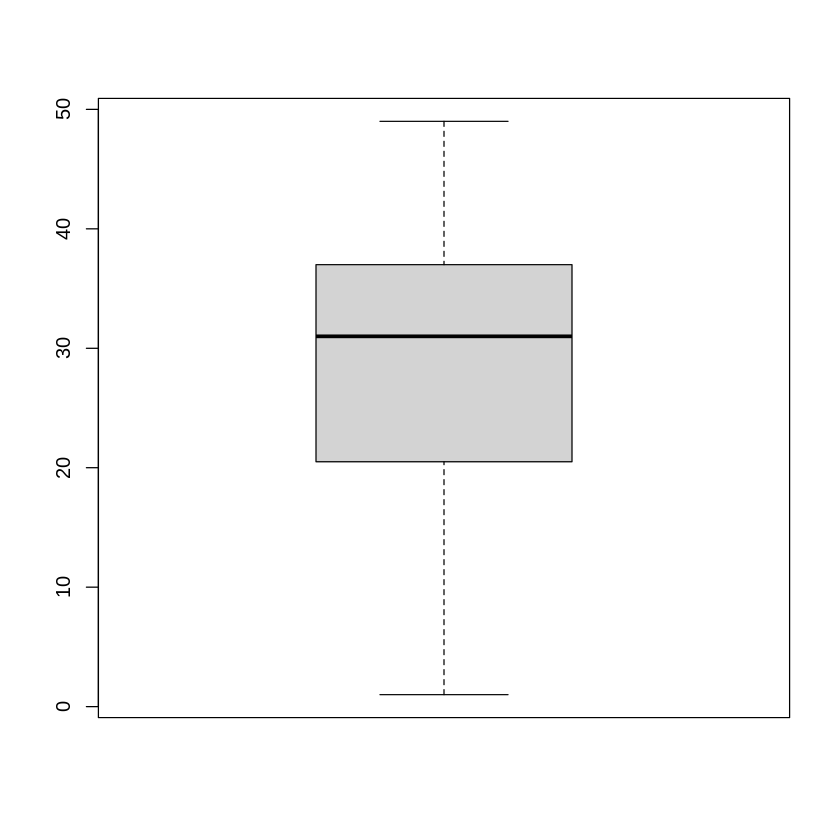

In [12]:
# bloxplot
boxplot(data$ansiedade)

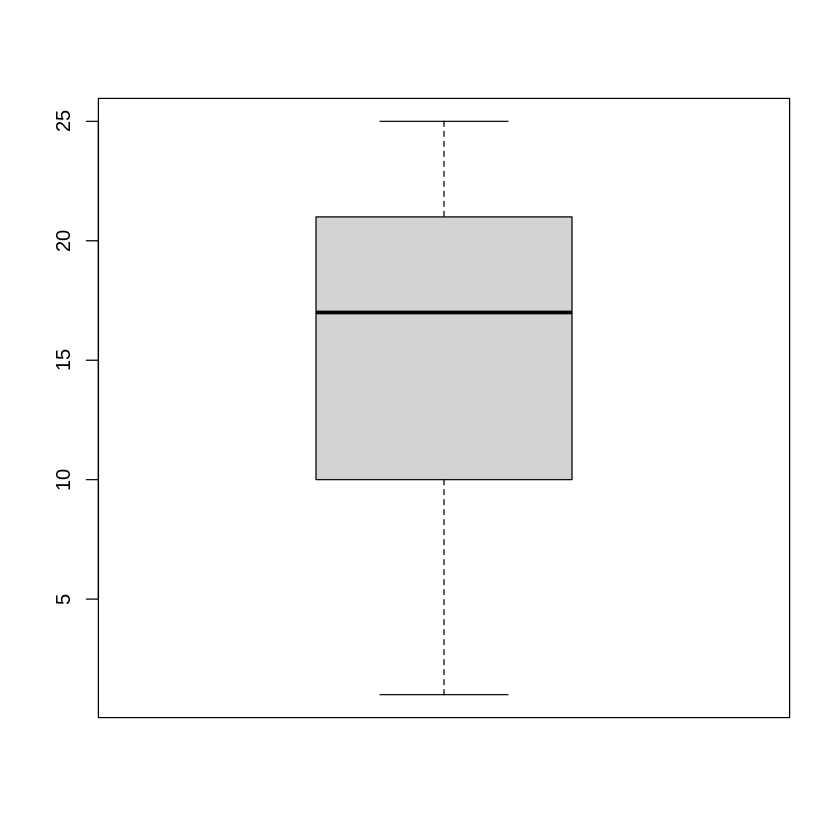

In [13]:
boxplot(data$nota)

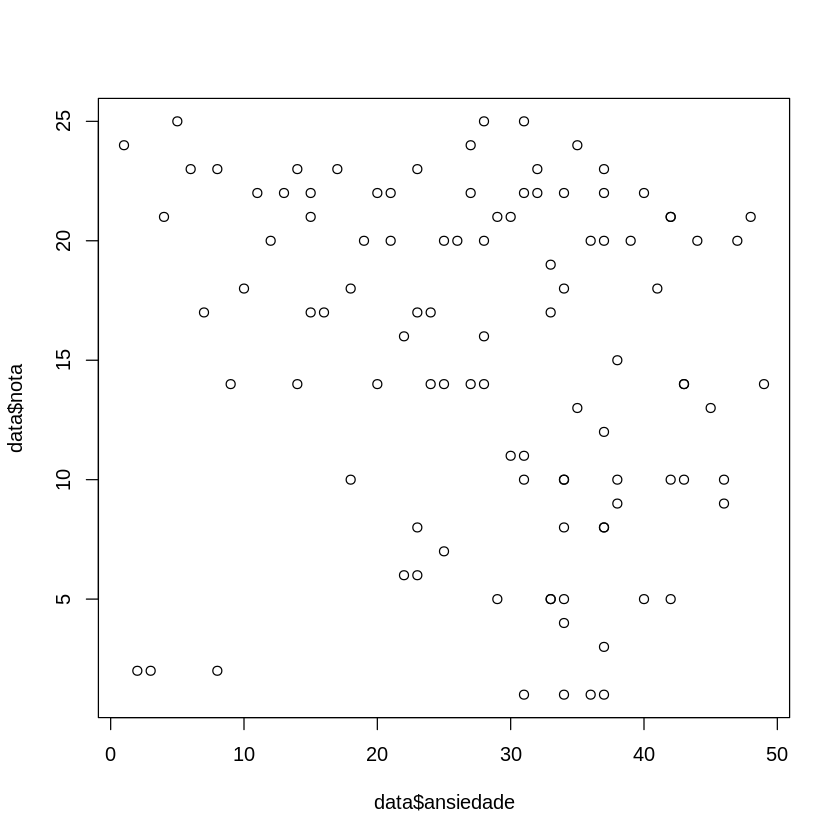

In [14]:
# plot
plot(data$ansiedade, data$nota)

In [21]:
# linear regression
mod_reg <- lm(nota ~ ansiedade, data)

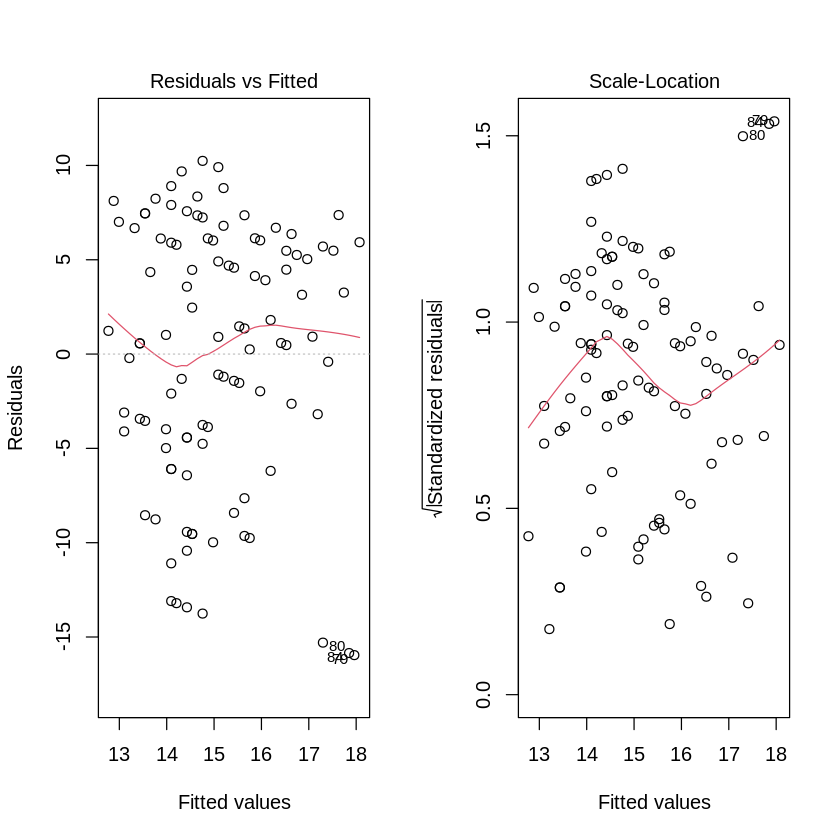

In [22]:
# graphic analysis
par(mfrow=c(1,2))
plot(mod_reg, which = c(1,3))

In [23]:
par(mfrow=c(1,1))

In [24]:
# pearson correlation
cor.test(data$nota, data$ansiedade, method='pearson')


	Pearson's product-moment correlation

data:  data$nota and data$ansiedade
t = -1.9026, df = 101, p-value = 0.05995
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.366344726  0.007797991
sample estimates:
       cor 
-0.1860074 


In [25]:
# spearman correlation
cor.test(data$nota, data$ansiedade, method='spearman')

Warning message in cor.test.default(data$nota, data$ansiedade, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$nota and data$ansiedade
S = 225314, p-value = 0.01581
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2372824 


In [26]:
# pearsonkendall correlation
cor.test(data$nota, data$ansiedade, method='kendal')


	Kendall's rank correlation tau

data:  data$nota and data$ansiedade
z = -2.3854, p-value = 0.01706
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1651714 


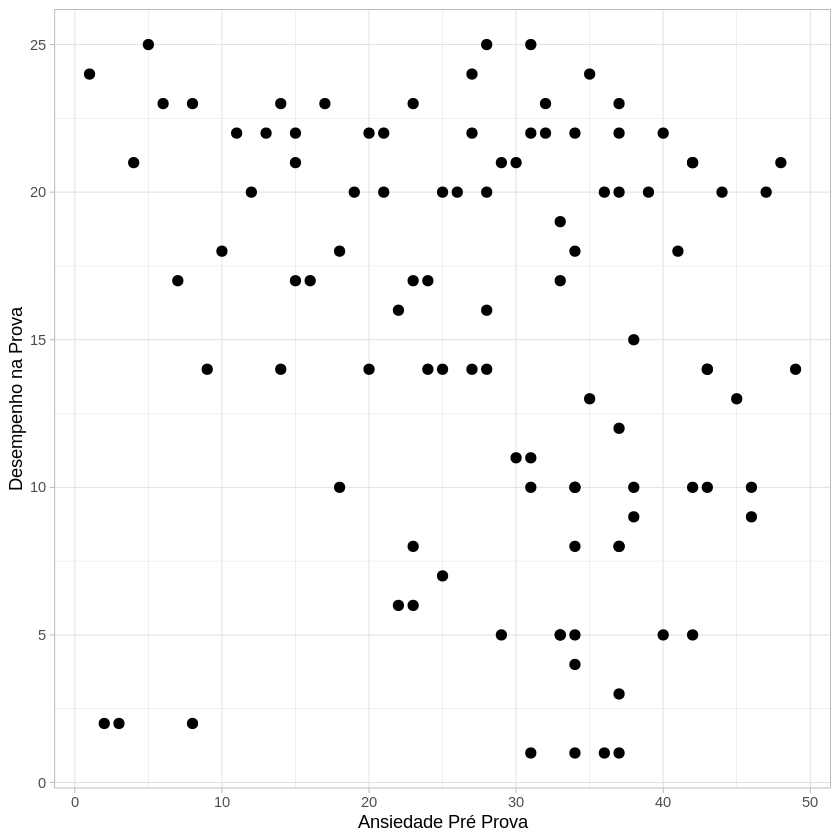

In [45]:
ggplot(data, aes(x=ansiedade, y=nota)) + 
labs(x="Ansiedade Pré Prova", y="Desempenho na Prova") + 
geom_point(size=2.5) + 
theme_light()

In [50]:
# creating correlation matrix using pearson method
matrix = round(cor(data[2:4], method='pearson'),3)

In [51]:
View(matrix)

,tempo_revisao,nota,ansiedade
tempo_revisao,1.000,0.074,-0.212
nota,0.074,1.000,-0.186
ansiedade,-0.212,-0.186,1.000


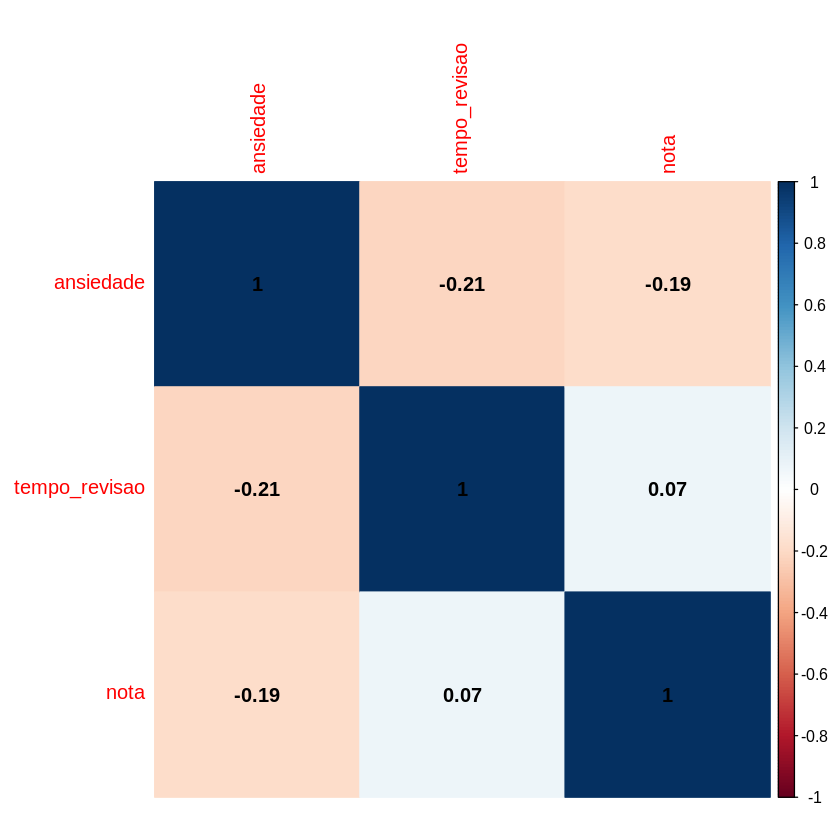

In [58]:
# plotting correlation matrix 
corrplot(matrix, method='color', order='hclust', addCoef.col='black')

## The Pearson correlation showed that there's a negative and weak correlation between the variables ansiedade and nota